In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../code/')

import intcode_computer as ic

In [3]:
with open('input.txt') as inp:
    in_program = inp.read()

In [4]:
turn_dict = {'up1': 'right',
           'right1': 'down',
           'down1': 'left',
           'left1': 'up',
            'up0': 'left',
            'left0': 'down',
            'down0': 'right',
            'right0': 'up'
           }

In [5]:
class robot:
    def __init__(self, brain, verbose=False):
        self.brain = brain
        
        self._facing = 'up'
        self._tile = (0, 0)
        
        self.painted_tiles = 0
        
        self._verbose = verbose
        
    def turn(self, direction):
        self._facing = turn_dict[self._facing + str(direction)]
        if self._verbose:
            print('Turning signal: {}. Now facing: {}'.format(direction, self._facing))
        
    def move(self):
        if self._facing == 'up':
            self._tile = (self._tile[0], self._tile[1]+1)
        elif self._facing == 'down':
            self._tile = (self._tile[0], self._tile[1]-1)
        elif self._facing == 'left':
            self._tile = (self._tile[0]-1, self._tile[1])
        elif self._facing == 'right':
            self._tile = (self._tile[0]+1, self._tile[1])
        else:
            raise ValueError
                
        if self._verbose:
            print('Moving {} to {}'.format(self._facing, self._tile))
        
    def paint(self, panels):
        if self._tile in panels:
            panel_color = panels[self._tile]
        else:
            panel_color = 0
            self.painted_tiles += 1
        
        if self._verbose:
            print('Robot is at: {}'.format(self._tile))
            print('Camera reads color: {}'.format(panel_color))
        self.brain.input(panel_color)
        
        instructions = self.brain.run()
        
        color_to_paint = instructions[0]
        if self._verbose:
            print('Painting {} with color {}'.format(self._tile, color_to_paint))
        panels[self._tile] = color_to_paint
        
        how_to_turn = instructions[1]
        
        self.turn(how_to_turn)
        self.move()
        
        return panels

## Part I

In [6]:
verbose = False

brain = ic.machine(in_program, return_output = True, inputs=[], reset_outputs = True, verbose=verbose)
painter = robot(brain, verbose=verbose)

In [7]:
panels = {}

In [8]:
while not painter.brain.is_terminated:
    panels = painter.paint(panels)

In [9]:
painter.painted_tiles

2056

## Part II

In [10]:
verbose = False

brain = ic.machine(in_program, return_output = True, inputs=[], reset_outputs = True, verbose=verbose)
painter = robot(brain, verbose=verbose)

In [11]:
# single white panel
panels = {(0, 0): 1}

In [12]:
while not painter.brain.is_terminated:
    panels = painter.paint(panels)

In [13]:
import numpy as np

def image_from_panels(panels):
    minx = np.inf
    miny = np.inf
    maxx = -np.inf
    maxy = -np.inf
    for pt in panels.keys():
        minx = min(minx, pt[0])
        maxx = max(maxx, pt[0])
        miny = min(miny, pt[1])
        maxy = max(maxy, pt[1])
    
    siz_x = maxx - minx
    siz_y = maxy - miny
    image = np.ones((siz_y+1, siz_x+1))
    
    delta_y = abs(miny)
    delta_x = abs(minx)
    
    for x,y in panels:
        # flip y to make the plot readable
        image[siz_y-(y+delta_y), (x+delta_x)] = panels[(x,y)]
    
    return image

In [14]:
image = image_from_panels(panels)

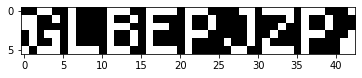

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
ax = plt.axes()
ax.imshow(image, interpolation='nearest', cmap=cm.Greys_r)
plt.show()